## Part a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
figsize=(12, 4.5)

In [2]:
x = '''0 0 0 -4 0 0 0 0 0 0 2 2 2 2 
2 0 -3 -3 -3 0 0 0 0 0 1 -4 0 4 
3 -1 2 -3 -1 0 2 -4 -2 1 0 0 0 3 
-3 3 -3 3 -3 3 -3 3 -3 0 0 0 0 0 0'''
x_a = map(lambda i: float(i.strip('\n')), x.split(' '))
x_a = list(x_a)

In [3]:
def plot_linegraph(x, y, xlabel, ylabel, title='', xmarker='o', 
                   xlinestyle='-', ymarker='x', ylinestyle='-.'):
    arange = np.arange(len(x))
    plt.figure(num=1, figsize=figsize)
    plt.scatter(arange, x, marker=xmarker, label=xlabel)
    plt.plot(x, linestyle=xlinestyle)
    plt.scatter(arange, y, marker=ymarker, label=ylabel)
    plt.plot(y, linestyle=ylinestyle)
    plt.title(title)
    plt.xlim(-1, len(x))
    plt.hlines(0, -1, len(x), linestyle='dotted', color='black')
    plt.legend()   

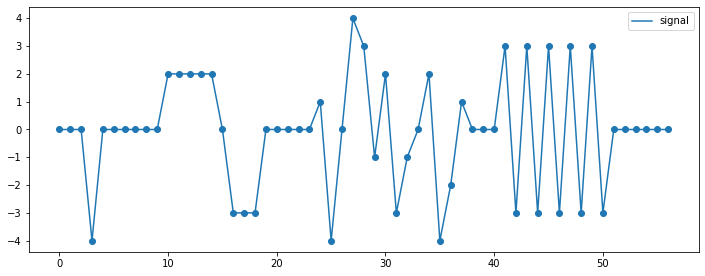

In [4]:
plt.figure(num=1, figsize=figsize)
plt.scatter(np.arange(len(x_a)), x_a)
plt.plot(x_a, label='signal')
plt.legend()

### Part (a.i) Exponential Averaging system <br />

$y_n = \sum_{m=0}^n \alpha * (1 - \alpha)^{n-m} * x_m$ <br />
$y_n= \alpha * x_n + (1-\alpha)*y_{n-1}$ <br />
$ \implies y_n - (1-\alpha)*y_{n-1} = \alpha * x_n$ <br />

Thus, b = [$\alpha$] and a = [1, $\alpha - 1$]

Further showing 7 different exponential averaging systems with [1 2 3 4]/5
as the value for $\alpha$

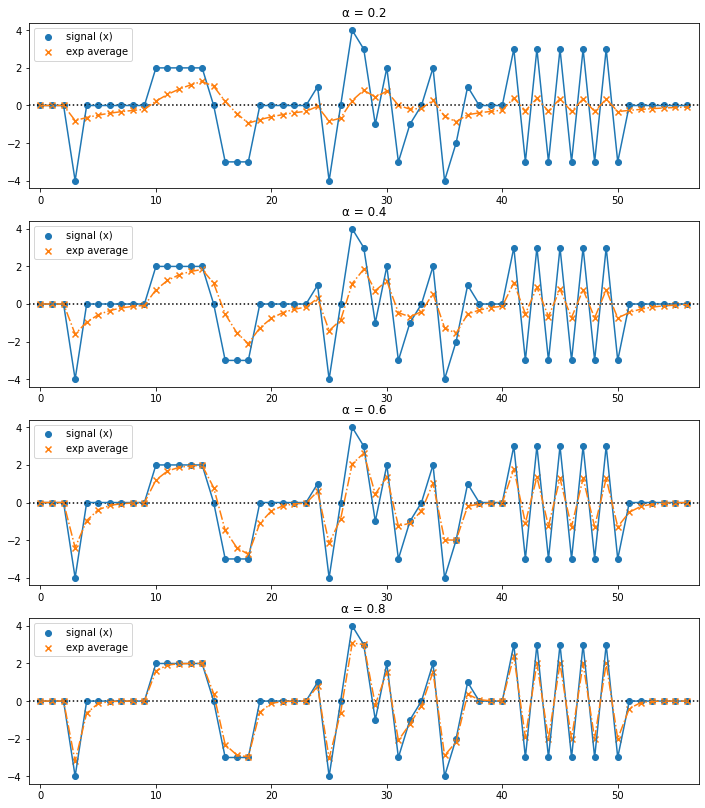

In [5]:
n, v = 5, 0.2
fig, axs = plt.subplots(n-1)
fig.set_size_inches(12., (n-1)*3.5, forward=True)
plt.title("Part a(i) Exponential Averaging System")
indices = np.arange(len(x_a))
for i in range(n-1):
    alpha = (i+1)*v
    x_exponen = signal.lfilter([alpha], [1., alpha-1], x_a)
    axs[i].scatter(indices, x_a, label='signal (x)')
    axs[i].plot(indices, x_a)
    axs[i].scatter(indices, x_exponen, marker='x', label='exp average')
    axs[i].plot(indices, x_exponen, linestyle='-.')
    axs[i].set_title('\u03B1 = %.1f'%alpha)
    axs[i].hlines(0, -1, len(x_a), color='black', linestyle='dotted')
    axs[i].set_xlim(-1, len(x_a))
    axs[i].legend()

### Part (a.ii) Accumulator System <br />

$y_n = \sum_{m=0}^n x_m$ <br />
$y_n = x_n + y_{n-1}$ <br />
$y_n - y_{n-1} = x_n$ <br />

Thus b = [1] and a = [1, -1]

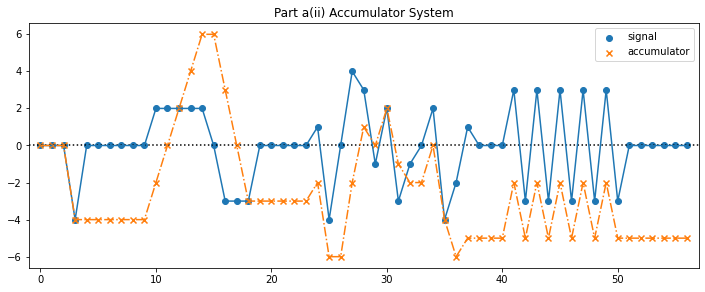

In [6]:
x_accumulator = signal.lfilter([1], [1, -1], x_a)
plot_linegraph(x_a, x_accumulator, 
              xlabel='signal', 
              ylabel='accumulator',
              title='Part a(ii) Accumulator System')

### Part (a.iii) Backward Difference System <br />

$y_n = x_n - x_{n-1}$ <br />

Thus, b = [1, -1] and a = [1]

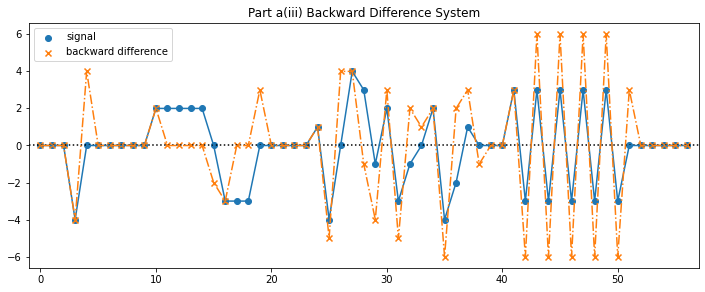

In [7]:
x_backward_difference = signal.lfilter([1, -1], [1], x_a)

plot_linegraph(x_a, x_backward_difference, 
               xlabel='signal', 
               ylabel='backward difference', 
               title='Part a(iii) Backward Difference System')

## Part (b)

In [8]:
low_pass_45 = signal.firwin(50, 45/150)
low_pass_50 = signal.firwin(50, 50/150)
Fs_b = 300
fs_b = 100
def reconstruction_filter_b(t, X, fs):
    # t is the timestamp we are looking for
    # Fs is original frequency of sampling 300
    # X is the new sampled signal
    # fs is the new sampling frequency
    sincs = np.sinc(t*fs - np.arange(len(X)))
    output = np.dot(X, sincs)
    return output

In [9]:
def plot_linegraphs_unmarked(x, y, xlabel, ylabel, xlinestyle='-', 
                             ylinestyle='-.', title=''):
    plt.figure(num=1, figsize=figsize)
    plt.plot(x, label=xlabel, linestyle=xlinestyle)
    plt.plot(y, label=ylabel, linestyle=ylinestyle)
    plt.title(title)
    plt.legend()

#### vector $a$ is trivially [1] in this case for both low_pass_45 and low_pass_50

In [10]:
r_b = np.random.normal(0, 1, size=Fs_b)
r_b[:15] = 0
r_b[-15:] = 0
x_b = np.array(signal.filtfilt(low_pass_45, [1.], r_b))
y_b = [x_b[i] if i%3==0 else 0 for i in range(Fs_b)]

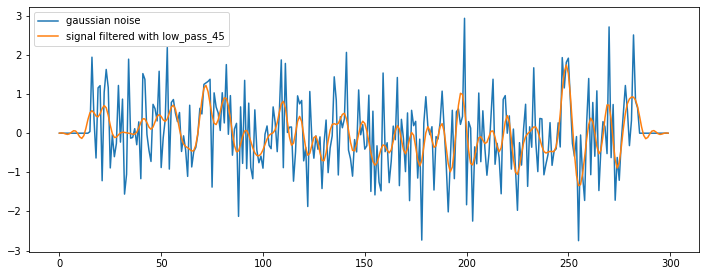

In [11]:
plot_linegraphs_unmarked(r_b, x_b, xlabel='gaussian noise', 
                         ylabel='signal filtered with low_pass_45', 
                         ylinestyle='-')

The square difference of x and z is : 0.0009126812922536436


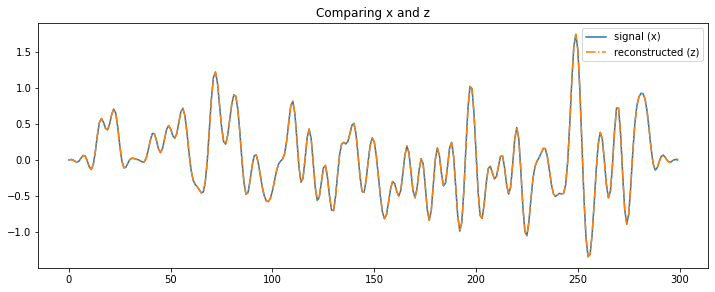

In [12]:
X_b = np.array(y_b[::3])

z_bf = np.vectorize(lambda i: reconstruction_filter_b(i/Fs_b, X_b, fs_b))
z_b = z_bf(np.arange(Fs_b))

print("The square difference of x and z is :", np.sum((x_b - z_b)**2))
plot_linegraphs_unmarked(x_b, z_b, xlabel='signal (x)', 
                         ylabel='reconstructed (z)', 
                         title='Comparing x and z')

As we can see from the squared difference $\sum_{i=0}^n (x_i - z_i)^2$ is 0.001 (approx) and $z$ is very close to $x$ only deviating a bit at the edges

The square difference of x and u is : 0.04227483716941461


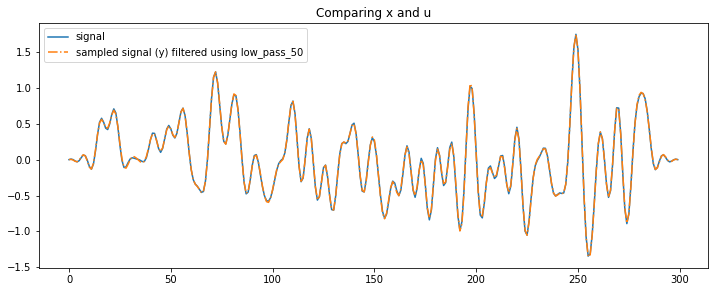

In [13]:
u_b = 3*signal.filtfilt(low_pass_50, [1.], y_b)
print("The square difference of x and u is :", np.sum((x_b - u_b)**2))

plot_linegraphs_unmarked(x_b, u_b, xlabel='signal', 
                    ylabel='sampled signal (y) filtered using low_pass_50',
                    title='Comparing x and u')

As we can see from the squared difference $\sum_{i=0}^n (x_i - z_i)^2$ is 0.04 (approx) much higher than that with $z$, upon closer inspection it is clear that $u$ is very close to $x$ but not quite equal.

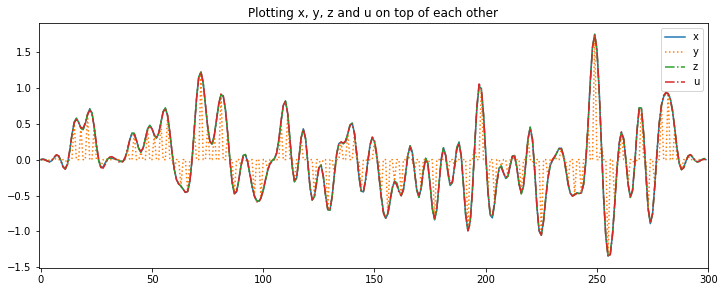

In [14]:
plt.figure(num=1, figsize=figsize)
plt.plot(x_b, label='x', linestyle='-')
plt.plot(y_b, label='y', linestyle=':')
plt.plot(z_b, label='z', linestyle='-.')
plt.plot(u_b, label='u', linestyle='-.')
plt.xlim(-1, len(x_b))
plt.title('Plotting x, y, z and u on top of each other')
plt.legend()

### Part (b.ii) <br />

If the second filter had a lower cut-off frequency ($f < f_0$) then when we tried to reconstruct the original siganl ($x$) we would only be able to successfully reconstruct the signal for the frequencies upto $f$. <br />
This is why we need the second filter to have higher cut-off ($f \ge f_0$) so that we can accurately get back all of the frequencies.

## Part (c.i)

In [15]:
Fs_c = 3000
fs_c = 30

band_pass_31_44_b, band_pass_31_44_a = signal.cheby2(3, 30, [31/1500, 44/1500], "bandpass", output='ba')
band_pass_30_45_b, band_pass_30_45_a = signal.cheby2(3, 20, [30/1500, 45/1500], "bandpass", output='ba')

In [16]:
def reconstruction_filter_c(t, X, fs):
    n = len(X)
    T = t*fs - np.arange(n)
    sincs = np.sinc(T/2)
    coses = np.cos((5/2)*np.pi*T)
    
    ht = np.multiply(sincs, coses)
    
    return np.dot(X, ht)

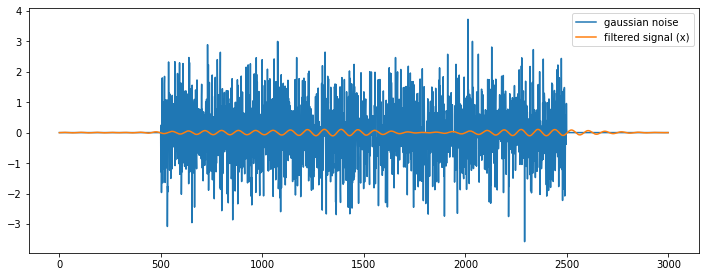

In [17]:
r_c = np.random.normal(size=Fs_c)
r_c[:500] = 0
r_c[-500:] = 0

x_c1 = signal.filtfilt(band_pass_31_44_b, band_pass_31_44_a, r_c)
y_c1 = [x_c1[i] if i%100 == 0 else 0 for i in range(len(x_c1))]
plot_linegraphs_unmarked(r_c, x_c1, xlabel='gaussian noise', 
                         ylabel='filtered signal (x)', ylinestyle='-')

The square difference is:  0.00015588199989211986


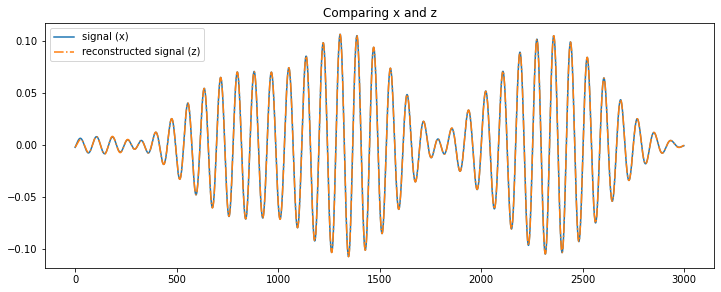

In [18]:
# the sampled values {x}_n
X_c1 = np.array(y_c1[::100])

z_c1f = np.vectorize(lambda i: reconstruction_filter_c(i/Fs_c, X_c1, fs_c))
z_c1 = z_c1f(np.arange(Fs_c))

print("The square difference is: ", np.sum((z_c1 - x_c1)**2))
plot_linegraphs_unmarked(x_c1, z_c1, xlabel='signal (x)', 
                        ylabel='reconstructed signal (z)',
                        title='Comparing x and z')

By zooming into different sections of the graphs we can see that initially the reconstruction $z$ seems to lead the singal $x$. In between $z$ is very closely approximates the signal and towards it end it begins to loose accuracy again.

The square difference is approx 0.001.

The square difference is:  0.0903368076189313


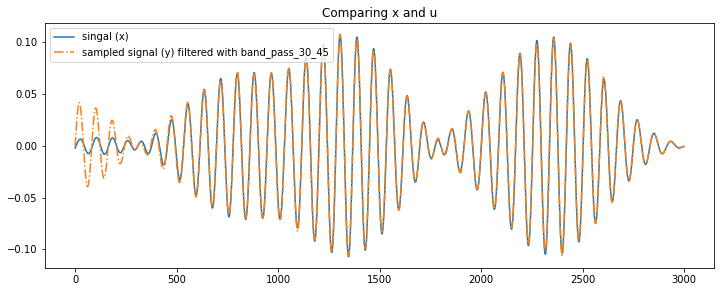

In [19]:
u_c1 = 100*(signal.filtfilt(band_pass_30_45_b, band_pass_30_45_a, y_c1))

al = 0

print("The square difference is: ", np.sum((u_c1 - x_c1)**2))
plot_linegraphs_unmarked(x_c1, u_c1, xlabel='singal (x)', 
                ylabel='sampled signal (y) filtered with band_pass_30_45',
                title='Comparing x and u')

$u$ is very inaccurate towards the beginning with lots of high applitude ocillations compared to the relatively silent signal ($x$). <br />
In most iterations, the first 500 values in $u$ are completely inaccurate but then it starts to approximate $x$ well. 

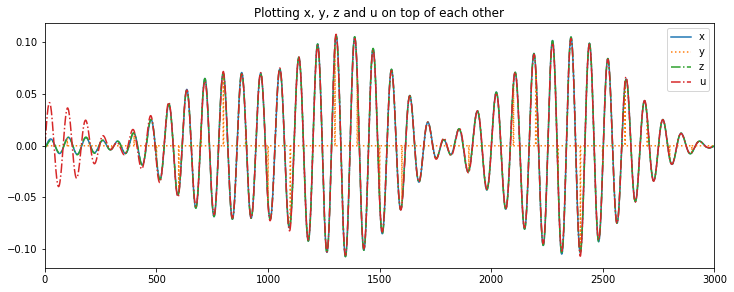

In [20]:
plt.figure(num=1, figsize=figsize)
plt.plot(x_c1, label='x', linestyle='-')
plt.plot(y_c1, label='y', linestyle=':')
plt.plot(z_c1, label='z', linestyle='-.')
plt.plot(u_c1, label='u', linestyle='-.')
plt.xlim(-1, len(x_c1))
plt.title('Plotting x, y, z and u on top of each other')
plt.legend()

## Part (c.ii)

In [21]:
band_pass_26_39_b, band_pass_26_39_a = signal.cheby2(3, 30, [26/1500, 39/1500], 'bandpass', output='ba')
band_pass_25_40_b, band_pass_25_40_a = signal.cheby2(3, 20, [25/1500, 40/1500], 'bandpass', output='ba')

In [22]:
x_c2 = signal.filtfilt(band_pass_26_39_b, band_pass_26_39_a, r_c)
y_c2 = [x_c2[i] if i%100==0 else 0 for i in range(len(x_c2))]

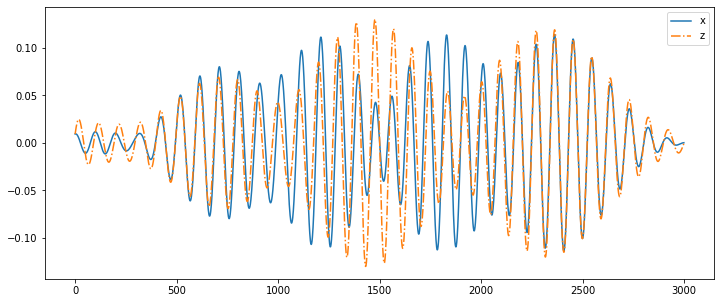

In [23]:
X_c2 = np.array(y_c2[0::100])

z_c2f = np.vectorize(lambda i: reconstruction_filter_c(i/Fs_c, X_c2, fs_c))
z_c2 = z_c2f(np.arange(Fs_c))
    
plt.figure(num=1, figsize=(12, 5))
plt.plot(x_c2, label='x')
plt.plot(z_c2, label='z', linestyle='-.')
plt.legend()

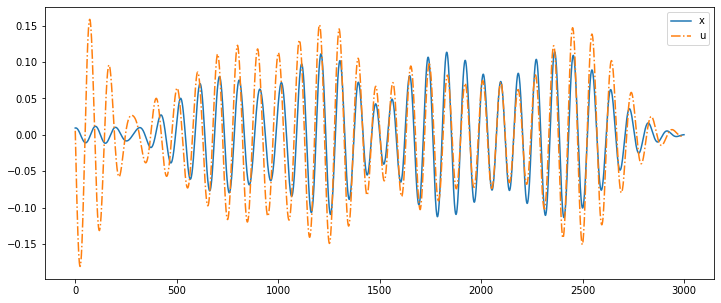

In [24]:
u_c2 = 100*(signal.filtfilt(band_pass_25_40_b, band_pass_25_40_a, y_c2))

plt.figure(num=1, figsize=(12, 5))
plt.plot(x_c2, label='x')
plt.plot(u_c2, label='u', linestyle='-.')
plt.legend()

### Part (c.ii)

Our sampling frequency is $f_s = 30 hz$ and for interval $[25, 40]$ as suggested<br />
$\nexists n \in Z : n \cdot f_s / 2 \le 25 \wedge (n+1) \cdot f_s/2 \ge 40$ <br />
This means that the interval spans both $[15, 30]$ for $n=1$ and $[30, 45]$ for $n=2$ <br />

Because it lies in both the intervals we see there is some aliasing and thus we expect to be unable to reproduce the original signal. This is demonstrated above.